---
#  Dependencies
---


In [129]:
# uncomment to install tensorflow !!!
#!pip install tensorflow

In [95]:
import json
import tensorflow as tf
import pandas as pd
import numpy as np
import codecs

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [60]:
vocab_size = 7753
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 6700


---
# Loading Data
---

In [130]:
# loading the data & dropping ID column

df = pd.read_csv('Train.csv', encoding='utf-8')
df = df.drop(['ID'], axis=1)

In [131]:
df

,Feed,Sentiment
0,m3alem bourjilia w illi ma yefehmouch yelzmou ...,Positive
1,Ya m3alllam,Positive
2,Ma7lek! Zin ou fannena 7loua.,Positive
3,hhhhh ya bliiiiiiiida ya Hanen,Negative
4,Nikraha w ma5yebha pffff,Negative
...,...,...
8396,نوفل ما يجيب كان المنح وخوف ملا زبالة منال عما...,Negative
8397,نسبة مشاهدة كبيرة رغم التشويش الى صار ...برافو...,Positive
8398,Mala ta7ana makyebha,Negative
8399,Tefah,Negative


---
# Data processing
---

In [97]:
sentences = []
labels = []
sentences = df['Feed'].astype(str)
labels = df['Sentiment'].astype(str)
values = np.array(labels)

# Encoding labels  
print(values)
# integer encode
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(values)
print(labels)

['Positive' 'Positive' 'Positive' ... 'Negative' 'Negative' 'Negative']
[1 1 1 ... 0 0 0]


In [98]:
#Splitting the data 

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [80]:
# vocab size

pd.unique(pd.Series(pd.Categorical(sentences)))

['m3alem bourjilia w illi ma yefehmouch yelzmou..., 'Ya m3alllam', 'Ma7lek! Zin ou fannena 7loua.', 'hhhhh ya bliiiiiiiida ya Hanen', 'Nikraha w ma5yebha pffff', ..., 'ya ka7ba', 'نوفل ما يجيب كان المنح وخوف ملا زبالة منال عم..., 'نسبة مشاهدة كبيرة رغم التشويش الى صار ...براف..., 'Mala ta7ana makyebha', 'Tefah']
Length: 7753
Categories (7753, object): ['\r', '\r\nMassottttttt\r\nArmasta=maset\r\nرجع.ااطح..., '\r\nمزين\r\nJa3four m3alem\r\nبرافووو وليد رب..., ' #bravo_balti"', ..., '😡', '😢😢', '😢😢😢', '😭😥😦']

In [99]:
# toknizing words 
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [100]:
# Padding data 

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

---
# Creating Bidirectional LSTM Model
---

In [121]:
#Creating the Bidirectional LSTM model

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

In [123]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
210/210 - 46s - loss: 0.4439 - accuracy: 0.7661 - val_loss: 0.2946 - val_accuracy: 0.8677 - 46s/epoch - 217ms/step
Epoch 2/30
210/210 - 33s - loss: 0.1620 - accuracy: 0.9285 - val_loss: 0.2718 - val_accuracy: 0.8771 - 33s/epoch - 159ms/step
Epoch 3/30
210/210 - 34s - loss: 0.0961 - accuracy: 0.9516 - val_loss: 0.3347 - val_accuracy: 0.8607 - 34s/epoch - 162ms/step
Epoch 4/30
210/210 - 33s - loss: 0.0806 - accuracy: 0.9555 - val_loss: 0.3296 - val_accuracy: 0.8665 - 33s/epoch - 158ms/step
Epoch 5/30
210/210 - 33s - loss: 0.0736 - accuracy: 0.9603 - val_loss: 0.3806 - val_accuracy: 0.8583 - 33s/epoch - 157ms/step
Epoch 6/30
210/210 - 33s - loss: 0.0687 - accuracy: 0.9591 - val_loss: 0.4186 - val_accuracy: 0.8771 - 33s/epoch - 158ms/step
Epoch 7/30
210/210 - 34s - loss: 0.0757 - accuracy: 0.9607 - val_loss: 0.4443 - val_accuracy: 0.8730 - 34s/epoch - 161ms/step
Epoch 8/30
210/210 - 34s - loss: 0.0681 - accuracy: 0.9572 - val_loss: 0.3667 - val_accuracy: 0.8748 - 34s/epoch - 160

---
# Ploting Bidirectional LSTM Model 
---

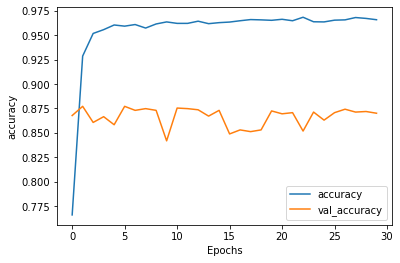

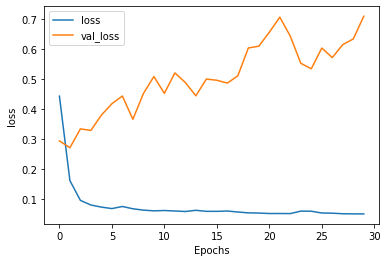

In [124]:
#Plotting LSTM model

import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

---
# Creating Model 1
---

In [132]:
#Creating the simple model AKA model1
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           124048    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 24)                408       
                                                                 
 dense_9 (Dense)             (None, 1)                 25        
                                                                 
Total params: 124,481
Trainable params: 124,481
Non-trainable params: 0
_________________________________________________________________


In [133]:
num_epochs = 30
history1 = model1.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
210/210 - 2s - loss: 0.6892 - accuracy: 0.5334 - val_loss: 0.6853 - val_accuracy: 0.5473 - 2s/epoch - 7ms/step
Epoch 2/30
210/210 - 1s - loss: 0.6632 - accuracy: 0.6115 - val_loss: 0.6434 - val_accuracy: 0.7372 - 644ms/epoch - 3ms/step
Epoch 3/30
210/210 - 1s - loss: 0.5871 - accuracy: 0.7307 - val_loss: 0.5442 - val_accuracy: 0.7837 - 631ms/epoch - 3ms/step
Epoch 4/30
210/210 - 1s - loss: 0.4576 - accuracy: 0.8416 - val_loss: 0.4295 - val_accuracy: 0.8607 - 622ms/epoch - 3ms/step
Epoch 5/30
210/210 - 1s - loss: 0.3378 - accuracy: 0.9031 - val_loss: 0.3530 - val_accuracy: 0.8765 - 654ms/epoch - 3ms/step
Epoch 6/30
210/210 - 1s - loss: 0.2646 - accuracy: 0.9154 - val_loss: 0.3184 - val_accuracy: 0.8783 - 656ms/epoch - 3ms/step
Epoch 7/30
210/210 - 1s - loss: 0.2185 - accuracy: 0.9336 - val_loss: 0.2918 - val_accuracy: 0.8824 - 670ms/epoch - 3ms/step
Epoch 8/30
210/210 - 1s - loss: 0.1853 - accuracy: 0.9412 - val_loss: 0.2815 - val_accuracy: 0.8854 - 679ms/epoch - 3ms/step
Epo

---
# Ploting Model 1
---

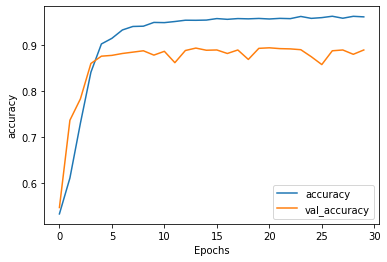

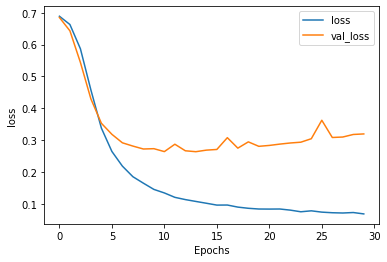

In [134]:
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

---
# TEST
---

In [128]:
#TEST LSTM model 
## if the result near 1 is positive
#### if the result near 0 is negative 

sentence = ["حسن "]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))


[[0.9900991]]


In [135]:
#TEST  model 1 aka simple model
## if the result near 1 is positive
#### if the result near 0 is negative 

sentence = ["حسن "]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model1.predict(padded))


[[0.94768476]]
